# 딥러닝 (Week 9. Deep Neural Network)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

- 어떤 시도를 "왜" 했는가 중요!!!

[Gradient Exploding / Gradient Vanshing / 훈련 속도 / Regularization]

1. Deep Neural Network 문제점
	- 1) Gradient Vanishing / Gradient Exploding
	- 2) 훈련 데이터 개수
	- 3) 훈련 속도
	- 4) Overfitting

	- 1) Gradient Vanishing & Exploding
		- (1) 개념
		- (2) 해결방안
			- 1] 초기화 종류
				- [1] Xavier 초기화
				- [2] 르쿤 (LuCun) 초기화
				- [3] He 초기화
			- 2] Activation Function
				- [1] 예시
				- [2] 문제점 : 수렴하지 않는 activation function
					- 1]] Dying ReLU
				- [3] 해결방안
					- 1]] Leaky ReLU
					- 2]] RReLU
					- 3]] PReLU
					- 4]] ELU
					- 5]] SELU
				- [4] 가이드라인
			- 3] Batch Normalization
				- [1] 개념
				- [2] 순서
			- 4] Gradient Clipping
				- [1] 개념
				- [2] 종류
	- 2) 훈련 속도 해결방안
		- (1) Transfer Learning
			- 1] 개념
			- 2] 예시
		- (2) Optimizer
			- 1] 기존 훈련 속도 향상 기법
				- [1] 좋은 초기화 전략 사용
				- [2] 좋은 활성화 함수 사용
				- [3] Batch Normalization
				- [4] Transfer Learning
			- 2] 새로운 훈련 속도 향상 기법
				- [1] 개념
				- [2] 종류
					- 1]] 모멘텀 최적화
					- 2]] 네스테로프 가속 경사
					- 3]] AdaGrad
					- 4]] RMSProp
					- 5]] Adam 최적화
					- 6]] 학습률 스케줄링
						- [[1]] 거듭제곱 기반 스케줄링
						- [[2]] 지수 기반 스케줄링
						- [[3]] 구간별 고정 스케줄링
						- [[4]] 성능 기반 스케줄링
						- [[5]] 1사이클 스케줄링
	- 3) Overfitting 해결방안
		- (1) Regularization
			- 1] 종류
				- [1] L1 Regularization & L2 Regularization
				- [2] DropOut
				- [3] Max-norm Regularization
2. 요약 가이드라인
	- 1) 기본 DNN 설정
	- 2) Self Normalization를 위한 DNN 설정

# 1. Deep Network 문제점

Shallow Network에서 Deep Network로 넘어갈 때 발생하는 문제들 ♣ 매우 중요
- 1) Gradient : 그레디언트 소실, 그레디언트 폭주 문제로 인해 하위층을 훈련하기 어려워 질 수 있음
- 2) 훈련 데이터 개수 : 훈련 데이터 불충분, 레이블 만드는 작업 비용 소모
- 3) 훈련 속도 : 훈련이 극단적으로 느려짐
- 4) Overfitting : 수백만개의 파라미터를 가진 모델은 훈련 세트에 과대적합 위험 (특히 훈련 샘플이 충분하지 않거나 잡음이 많은 경우)

## 1) Gradient Vanshing & Exploding

### (1) 개념

- 1] 그레디언트 소실(Vanishing Gradient)
  - 알고리즘이 하위층으로 진행될수록 그레디언트가 점점 작아지는 경우
- 2] 그레디언트 폭주(Exploding Gradient)
  - 그레디언트가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신되면서 알고리즘이 발산(diverse)
  - 순환신경망에서 주로 나타남(ex. RNN) ♣♣

- 3] 심층 신경망(Deep Neural Network)에서 그레디언트를 불안정하게 만드는 원인 ♣♣
    - Xavier Glorot과 Yoshua Bengio의 2010년 연구: http://proceedings.mlr.press/v9/glorot10a
    - 로지스틱 시그모이드 활성화 함수와 가중치 초기화 방법(평균이 0이고 표준편차가 1인 정규분포)의 조합
    - 위 활성화 함수와 초기화 방법을 사용했을 때 각 층에서 출력의 분산이 입력의 분산보다 더 크다는 것을 발견
    - 그 결과 가장 높은 층에서는 활성화 함수가 0 또는 1로 수렴

In [1]:
import numpy as np

def logit(z):
    return 1 / (1 + np.exp(-z))

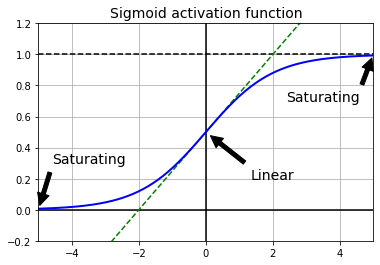

In [2]:
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### (2) 해결방안

#### 1] 초기화 종류

##### [1] Xavier 초기화 (= Glorot initialization) ♣♣


- 1]] 정방향 전파시 각 층의 출력에 대한 분산이 입력에 대한 분산과 같아야 함
- 2]] 역방향에서 층을 통과하기 전과 후의 그레디언트 분산이 동일해야 함
- 3]] 이를 위해서는 입력과 출력의 연결 개수인 $fan_{in}$과 $fan_{out}$이 잘 설정 되어야 함
- Xavier 초기화는 $fan_{avg} = (fan_{in}+fan_{out})$ / $2$ 사용 ♣

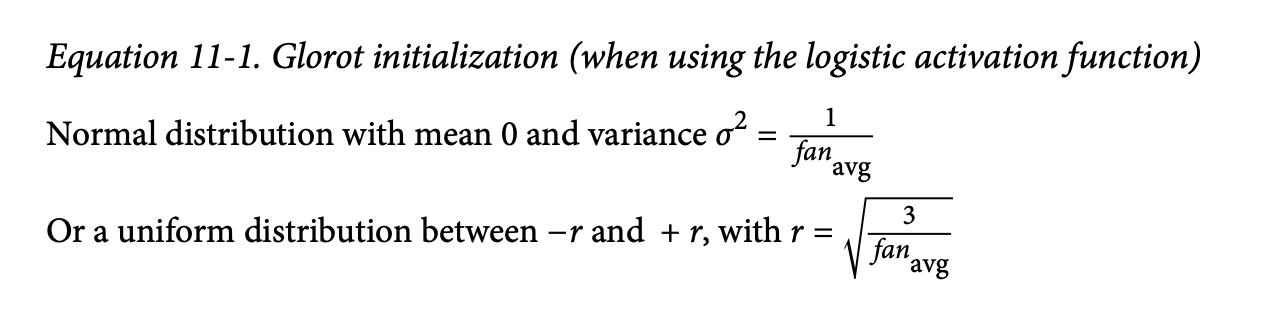

##### [2] 르쿤 (LuCun) 초기화 ♣♣

- $fan_{avg}$ 대신 $fan_{in}$을 사용하면 르쿤 초기화

##### [3] He 초기화 ♣♣

- ReLU 활성화 함수 (+ ELU 등 유사 활성화 함수) 경우 He 초기화가 더 잘 동작

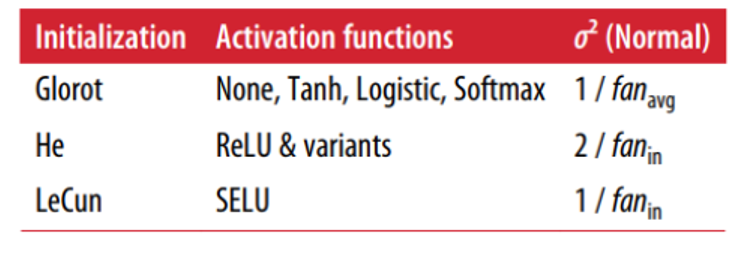

In [3]:
from tensorflow import keras

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

#### 2] Activation Function

##### [1] 예시

ReLU 활성화 함수에 대한 He 초기화

In [4]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

ReLU 활성화 함수에 대한 $fan_{avg}$ 기반의 균등분포 (uniform) He 초기화

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

##### [2] 문제점 : 수렴하지 않는 activation function

1]] Dying ReLU ♣♣
- 훈련하는 동안 일부 뉴런이 0 이외의 값을 출력하지 않음
- 큰 학습률을 사용하면 신경망의 뉴런 절반이 죽어 있기도 함 ♣
- 훈련 세트에 있는 모든 샘플에 대해 입력의 가중치 합이 음수가 되면 뉴런이 죽게 됨
- 가중치 합이 음수이면 ReLU 함수의 그레디언트가 0이 되므로 경사 하강법이 더는 작동하지 않음

##### [3] 해결책 종류

- 1]] LeakyReLU
  - Dying ReLU 문제 해결을 위한 활성화 함수
  - 하이퍼파라미터 alpha를 통해 함수가 새는 (leaky) 정도를 결정
  - 일반적으로 alpha = 0.01 로 설정 (예: 0.2는 많이 통과, 0,01은 조금 통과) ♣

In [6]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

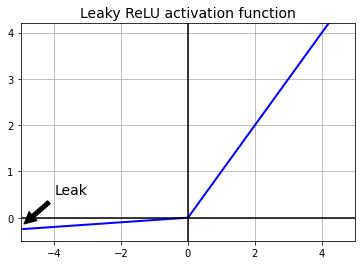

In [7]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [8]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

LeakyReLU를 사용해 패션 MNIST에서 신경망 훈련

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
import tensorflow as tf

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5157 - val_accurac

- 2]] RReLU (randomized leaky ReLU)
  - Leaky ReLU에서 alpha 값을 무작위로 제공 ♣
  - 테스트시에는 평균 alpha 값을 사용 ♣♣

- 3]] PReLU (parametric leaky ReLU)
  - alpha가 하이퍼파라미터가 아니고 다른 모델 파라미터와 마찬가지로 역전파에 의해 변경
  - 대규모 데이터셋에서는 ReLU보다 성능이 크게 앞서지만, 소규모 데이터셋에서는 훈련 세트에 과대적합 위험이 있음 ♣♣

PReLU 테스트

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8197 - accuracy: 0.7356 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6966 - accuracy: 0.7692 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5618 - accuracy: 0.8137 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5390 - accuracy: 0.8206 - val_loss: 0.5196 - val_accurac

- 4]] ELU (exponential linear unit)
  - Djork-Arne Clevert의 2015년 논문: https://arxiv.org/abs/1511.07289
  
  - [[1]] ELU 활성화 함수의 주요 장점
  - 훈련 시간이 줄고 신경망의 테스트 성능이 더 높아짐 ♣♣

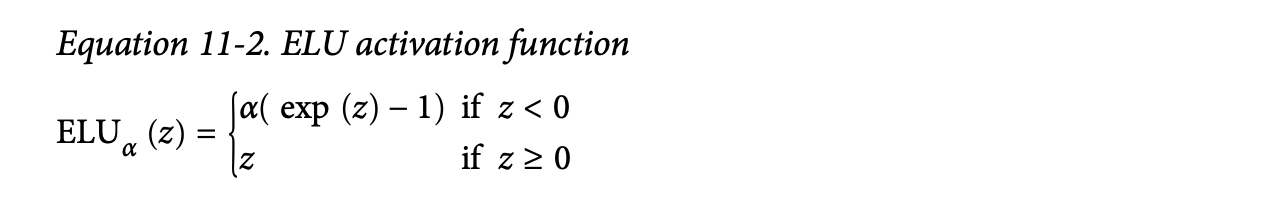

In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

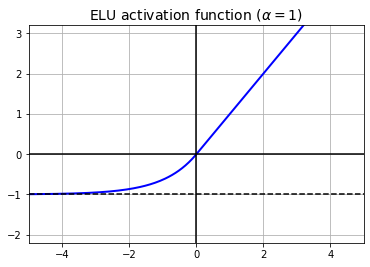

In [18]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

텐서플로에서 ELU 적용 (층을 만들 때 활성화 함수로 지정)

In [19]:
keras.layers.Dense(10, activation="elu")

- [[2]] ELU 활성화 함수의 주요 단점
  - (지수 함수를 사용하므로) ReLU 및 유사 함수들보다 계산이 느림
  - 훈련하는 동안에는 수렴 속도가 빨라서 느린 계산이 상쇄되지만, 테스트 시에는 ELU를 사용한 네트워크가 ReLU를 사용한 네트워크보다 느릴 것임(훈련 : ReLU보다 느린 계산 속도 but 빠른 수렴 속도, 테스트 : ReLU보다 느린 속도) ♣♣

- 5]] SELU(Scale ELU) ♣
  - Günter Klambauer, Thomas Unterthiner, Andreas Mayr의 2017년 [논문](https://arxiv.org/pdf/1706.02515.pdf)
  - 완전 연결 층만 쌓아서 신경망을 만들고 모든 은닉층이 SELU 활성화 함수와 LeCun 초기화를 사용한다면 네트워크가 자기 정규화(self-normalize)됨 ♣♣ 완전 연결층 + SELU 활성화 함수 + LeCun 초기화 -> 따로 batch normalization하지 않아도 된다
  - 훈련하는 동안 각 층의 출력이 평균 0과 표준편차 1을 유지하는 경향이 있으며, 이는 그레이디언트 소실과 폭주 문제를 막아줌 ♣♣
  - SELU 활성화 함수는 아주 깊은 네트워크(Deep Neural Network)에서 다른 활성화 함수보다 뛰어난 성능을 종종 냄 ♣♣

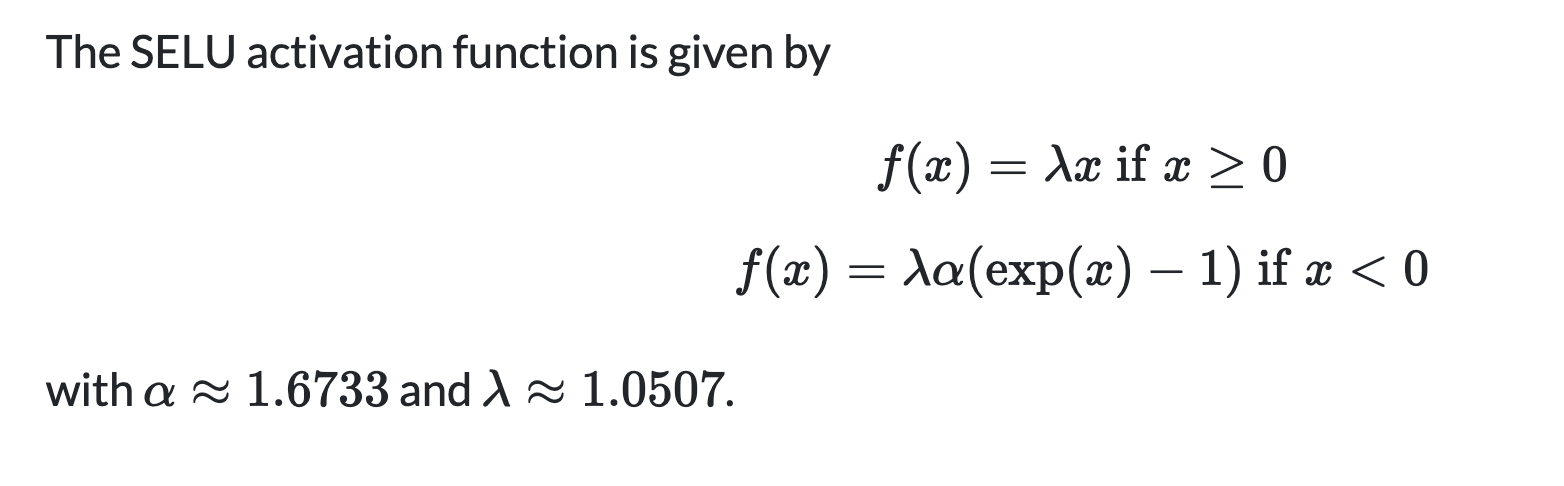

- [[1]] SELU에서 자기 정규화가 되기 위한 조건 ♣♣
  - 입력 특성이 반드시 표준화(평균 0, 표준편차 1)되어야 함 ♣
  - 모든 은닉층의 가중치는 LeCun 초기화 되어야 함
  - 네트워크는 일렬로 쌓은 층으로 구성되어야 함 (예: 와이드 & 딥 네트워크, 순환신경망 안됨). 그렇지 않으면 자기 정규화 특징이 보장되지 않음 (자기 정규화가 깨지면 SELU가 다른 활성화 함수보다 더 나은 성능을 내지 않음)

In [20]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [21]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

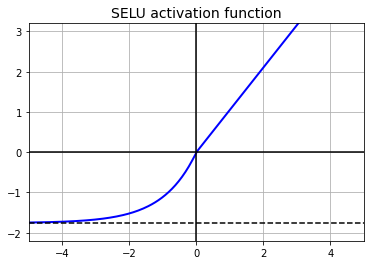

In [22]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

- [[2]] 특징
    - SELU 하이퍼파라미터(`scale`과 `alpha`)는 각 뉴런의 평균 출력이 0에 가깝고 표준 편차는 1에 가깝도록 조정됨(입력은 평균이 0이고 표준 편차 1로 표준화되었다고 가정)
    - 이 활성화 함수를 사용하면 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 거의 평균이 0이고 표준 편차를 1로 유지 ♣♣
    - 이를 통해 그레이디언트 폭주와 소실 문제를 피할 수 있음

In [23]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


keras를 통해 쉽게 SELU를 사용

In [24]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

100개의 은닉층과 SELU 활성화 함수를 사용한 패션 MNIST를 위한 신경망

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

훈련 시작 (입력을 평균 0과 표준 편차 1로 변환)

In [28]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 38s 20ms/step - loss: 0.9932 - accuracy: 0.6177 - val_loss: 0.7122 - val_accuracy: 0.7364
Epoch 2/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.7416 - accuracy: 0.7268 - val_loss: 0.6072 - val_accuracy: 0.7816
Epoch 3/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.5938 - accuracy: 0.7907 - val_loss: 0.5977 - val_accuracy: 0.7862
Epoch 4/5
1719/1719 [==============================] - 39s 22ms/step - loss: 0.5180 - accuracy: 0.8202 - val_loss: 0.5049 - val_accuracy: 0.8328
Epoch 5/5
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4793 - accuracy: 0.8350 - val_loss: 0.4632 - val_accuracy: 0.8430


ReLU 활성화 함수를 사용할 경우:

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 38s 20ms/step - loss: 1.7990 - accuracy: 0.2613 - val_loss: 1.5615 - val_accuracy: 0.3142
Epoch 2/5
1719/1719 [==============================] - 32s 19ms/step - loss: 1.1478 - accuracy: 0.5120 - val_loss: 1.0188 - val_accuracy: 0.5572
Epoch 3/5
1719/1719 [==============================] - 27s 15ms/step - loss: 0.9068 - accuracy: 0.6305 - val_loss: 0.8105 - val_accuracy: 0.6460
Epoch 4/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.8701 - accuracy: 0.6509 - val_loss: 0.7271 - val_accuracy: 0.7312
Epoch 5/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.7944 - accuracy: 0.6872 - val_loss: 0.6549 - val_accuracy: 0.7556


위는 그레디언트 폭주나 소실 문제가 발생한 것을 보여줌

##### [3] 가이드라인

- 심층 신경망의 은닉층에 어떤 활성화 함수를 써야 할까? ♣♣
  - 일반적 : SELU > ELU > LeakyReLU(그리고 변종들) > ReLU > tanh > 로지스틱(시그모이드) 순서
  - 네트워크가 자기 정규화되지 못하는 구조 : ELU > SELU
  - 실행속도 중요 : LeakyReLU
  - 많은 라이브러리와 하드웨어 가속기들 사용 : 가장 유명한 ReLU

#### 3] Batch Normalization

##### [1] 개념

- 2015년 논문에서 Sergey Ioffe와 Christian Szegedy가 제안: http://proceedings.mlr.press/v37/ioffe15.html
- gradient vanishing과 gradient exploding 문제를 해결하기 위한 배치 정규화(batch normalization) 기법 ♣

##### [2] 순서

- 각 층에서 활성화 함수를 통과하기 전이나 후에 모델에 연산을 하나 추가 ♣♣
    - 입력을 원점에 맞추고 정규화 (아래 3)
    - 각 층에서 두 개의 새로운 파라미터로 결과값의 스케일을 조정하고 이동 (아래 4)
    - 배치 정규화를 추가하면 훈련 세트를 표준화할 필요가 없음 ♣♣

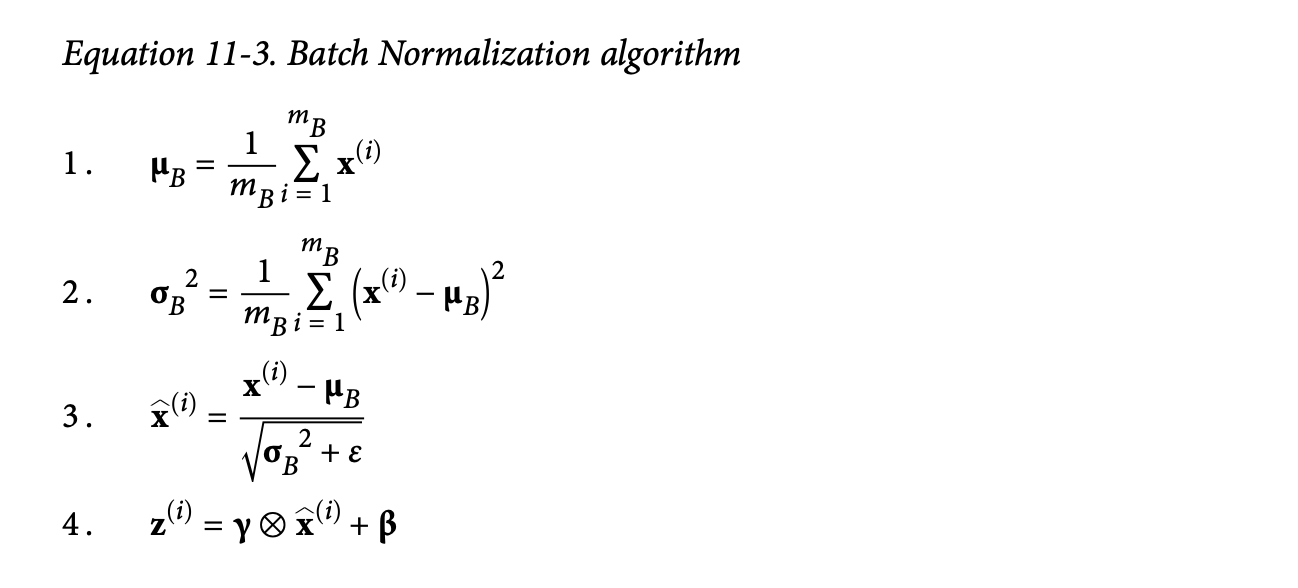

In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [36]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8228
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5754 - accuracy: 0.8031 - val_loss: 0.4724 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5189 - accuracy: 0.8206 - val_loss: 0.4375 - val_accuracy: 0.8548
Epoch 4/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4827 - accuracy: 0.8323 - val_loss: 0.4152 - val_accuracy: 0.8598
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4565 - accuracy: 0.8409 - val_loss: 0.3996 - val_accuracy: 0.8636
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4398 - accuracy: 0.8474 - val_loss: 0.3867 - val_accuracy: 0.8692
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4242 - accuracy: 0.8515 - val_loss: 0.3762 - val_acc

- 활성화 함수전에 배치 정규화(BN)를 적용해도 잘 동작함 (아닐 경우도 존재함) ♣♣
- `BatchNormalization` 층 이전의 층은 편향을 위한 항이 필요 없음 ♣♣
  - `BatchNormalization` 층이 이를 무효화하기 때문
  - 따라서 필요 없는 파라미터이므로 `use_bias=False`를 지정하여 층을 만듦

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8182
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5447 - accuracy: 0.8191 - val_loss: 0.4666 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8534
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8544
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_ac

#### 4] Gradient Clipping

##### [1] 개념

- 논문: https://proceedings.mlr.press/v28/pascanu13.html
- 순환 신경망에서 배치 정규화 적용이 어려움을 해결하고자 제안된 그레디언트 클리핑(gradient clipping): 그레디언트 벡터의 모든 원소를 -1.0 ~ 1.0 사이로 클리핑 ♣♣

##### [2] 종류

- 1]] clipvalue: 그레디언트 벡터 [0.9, 100.0]을 [0.9, 1.0]으로 클리핑 (벡터의 방향이 바뀜(초과값을 제한값으로 지정)) ♣♣
- 2]] clipnorm: clipnorm=1.0일 경우, [0.9, 100.0]을 [0.00899964, 0.9999595]로 클리핑 (벡터의 방향 유지(초과값 기준으로 mapping)) ♣♣

모든 케라스 옵티마이저는 `clipnorm`이나 `clipvalue` 매개변수 지원

In [42]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [43]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## 2) 훈련 속도 해결방안

### (1) Transfer Learning

#### 1] 개념

- 전이학습(transfer learning) ♣ 매우 중요
    - 아주 큰 규모의 DNN을 처음부터 새로 훈련하는 것은 좋은 생각이 아님
    - 비슷한 유형의 문제를 처리한 신경망이 이미 있는지 찾아본 다음, 그 신경망의 하위층을 재사용하는 것이 좋음 --> 전이학습(transfer learning)
        - 작업이 비슷할수록 더 많은 층을 재사용할 수 있음 ♣♣
        - 아주 비슷한 작업이라면 모든 은닉층을 유지하고 출력층만 교체함 ♣♣
    - 이를 통해 훈련 속도를 크게 높이고 필요한 훈련 데이터를 크게 줄일 수 있음 ♣

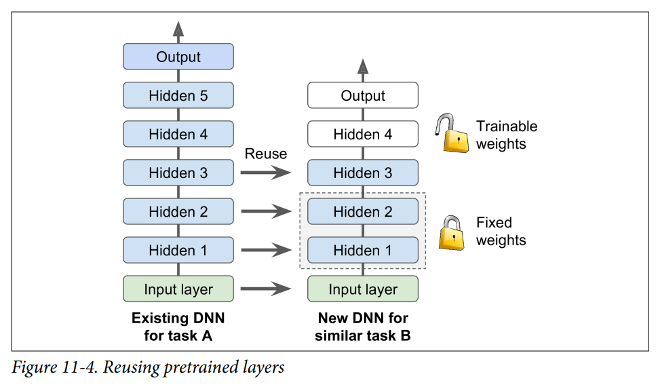

#### 2] 예시

패션 MNIST 훈련 세트를 두 개로 분리:
* `X_train_A`: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
* `X_train_B`: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트

- 이를 통해서:
  - A 세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B 세트(이진 분류)를 해결
  - A 작업에서 B 작업으로 약간의 지식이 전달되기를 기대
  - 왜냐하면 A 세트의 클래스(스니커즈, 앵클 부츠, 코트, 티셔츠 등)가 B 세트에 있는 클래스(샌달과 셔츠)와 조금 비슷하기 때문
  - 하지만 `Dense` 층을 사용하기 때문에 동일한 위치에 나타난 패턴만 재사용할 수 있음(반대로 합성곱 층은 훨씬 많은 정보를 전송함. 학습한 패턴을 이미지의 어느 위치에서나 감지할 수 있기 때문) ♣♣

In [44]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [45]:
X_train_A.shape

(43986, 28, 28)

In [46]:
X_train_B.shape

(200, 28, 28)

In [47]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [48]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [49]:
tf.random.set_seed(42)
np.random.seed(42)

In [50]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [51]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [52]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8822
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.8894 - val_loss: 0.3013 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8974 - val_loss: 0.2894 - val_accuracy: 0.9026
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2775 - val_accuracy: 0.9073
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2729 - accuracy: 0.9061 - val_loss: 0.2734 - val_accuracy: 0.9068
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2720 - val_accuracy:

In [53]:
model_A.save("my_model_A.h5")

In [54]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [55]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [56]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 46ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 32ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 30ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 30ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [57]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [58]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

- `model_B_on_A`와 `model_A`는 층을 공유하기 때문에 하나를 훈련하면 두 모델이 업데이트됨 ♣
- 이를 피하려면 `model_A`를 클론한 것을 사용해 `model_B_on_A`를 만들어야 함 ♣

In [59]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

- 새로운 출력층이 랜덤하게 초기화되어 있어 큰 오차를 만들어 재사용된 가중치를 망칠 수 있음
- 따라서 trainable 속성을 False로 지정해 몇 번의 에포크 동안 재사용된 층을 동결함으로써 새로운 층에게 적절한 가중치를 학습할 시간을 제공함 ♣♣

In [60]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [61]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 55ms/step - loss: 0.2638 - accuracy: 0.9400 - val_loss: 0.2781 - val_accuracy: 0.9290
Epoch 2/4
7/7 [==============================] - 0s 17ms/step - loss: 0.2542 - accuracy: 0.9400 - val_loss: 0.2685 - val_accuracy: 0.9310
Epoch 3/4
7/7 [==============================] - 0s 29ms/step - loss: 0.2449 - accuracy: 0.9400 - val_loss: 0.2599 - val_accuracy: 0.9341
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2365 - accuracy: 0.9400 - val_loss: 0.2518 - val_accuracy: 0.9381
Epoch 1/16
7/7 [==============================] - 1s 47ms/step - loss: 0.2117 - accuracy: 0.9450 - val_loss: 0.2039 - val_accuracy: 0.9645
Epoch 2/16
7/7 [==============================] - 0s 30ms/step - loss: 0.1694 - accuracy: 0.9550 - val_loss: 0.1717 - val_accuracy: 0.9716
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1406 - accuracy: 0.9650 - val_loss: 0.1491 - val_accuracy: 0.9807
Epoch 4/16
7/7 [===============

In [62]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [63]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9940


[0.05630684271454811, 0.9940000176429749]

전이학습(transfer learning)을 통해 오차율을 4.9배 감소시킴

In [64]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

### (2) 고속 옵티마이저

#### 1] 기존 훈련 속도 향상 기법

- 지금까지 살펴본 훈련 속도를 높이는 네 가지 방법 ♣♣
  - [1] 좋은 초기화 전략 적용하기
  - [2] 좋은 활성화 함수 사용하기
  - [3] 배치 정규화 사용하기
  - [4] 사전훈련된 네트워크의 일부 재사용하기

#### 2] 새로운 훈련 속도 향상 기법

[1] 개념

- 새로운 방법 : 표준적인 경사 하강법 옵티마이저 대신 더 빠른 옵티마이저를 사용

[2] 종류

- 1]] 모멘텀 최적화
- 2]] 네스테로프 가속 경사
- 3]] AdaGrad
- 4]] RMSProp
- 5]] Adam 최적화
- 6]] 학습률 스케줄링

##### 1]] 모멘텀 최적화

[[1]] 개념 ♣♣

- Boris Polyak가 1964년 제안한 원리: https://www.sciencedirect.com/science/article/abs/pii/0041555364901375
- 그레디언트를 속도가 아니라 가속도로 사용 ♣♣

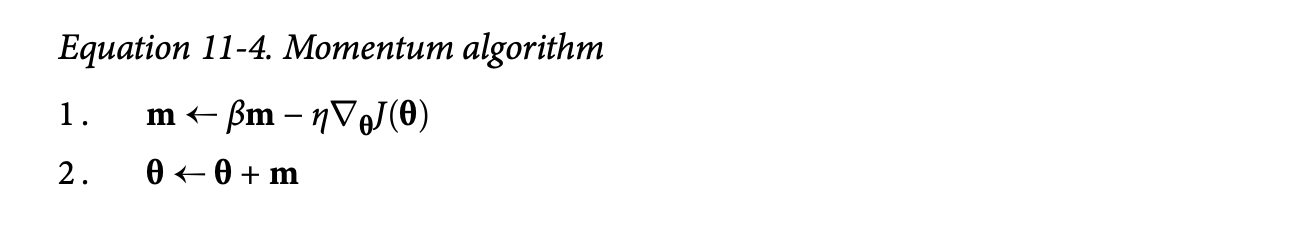

In [65]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

[[2]] 특징

- 모멘텀(momentum)을 조정하는 새로운 하이퍼파라미터 beta 사용 (일반적으로 beta = 0.9) ♣♣ 베타와 m이 곱해지면 convex한 함수에서 무조건 음수가 된다
  - 0 : 높은 마찰저항(기존과 같다)
  - 1 : 마찰저항 없음(모멘텀 최적화 term 증가 / 너무 크면 발산)
- 모멘텀 최적화가 경사 하강법보다 훨씬 빠르게 진행됨
  - 경사 하강법은 가파른 경사를 꽤 빠르게 내려가지만 좁고 긴 골짜기에서는 오랜 시간이 걸림 ♣
  - 반면 모멘텀 최적화는 점점 빠르게 내려가면서 지역 최적점(local optima)을 건너뛰도록 하는데 도움이 됨 ♣♣

[[3]] 시각화

- 모멘텀 테스트: https://distill.pub/2017/momentum/

##### 2]] 네스테로프 가속 경사

[[1]] 개념 ♣♣

- 1983년 Yurii Nesterov가 제안한 모멘텀 최적화의 변종: https://cir.nii.ac.jp/crid/1570572699326076416
- 현재 위치가 theta가 아니라 조금 앞선 값으로 비용 함수의 그레디언트를 계산(선제적 대응) ♣♣

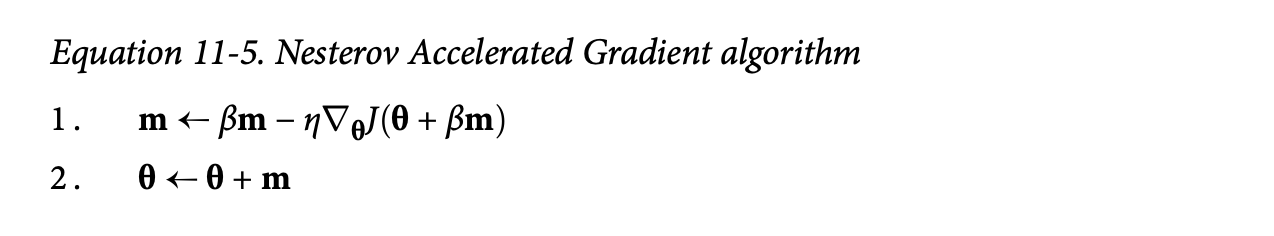

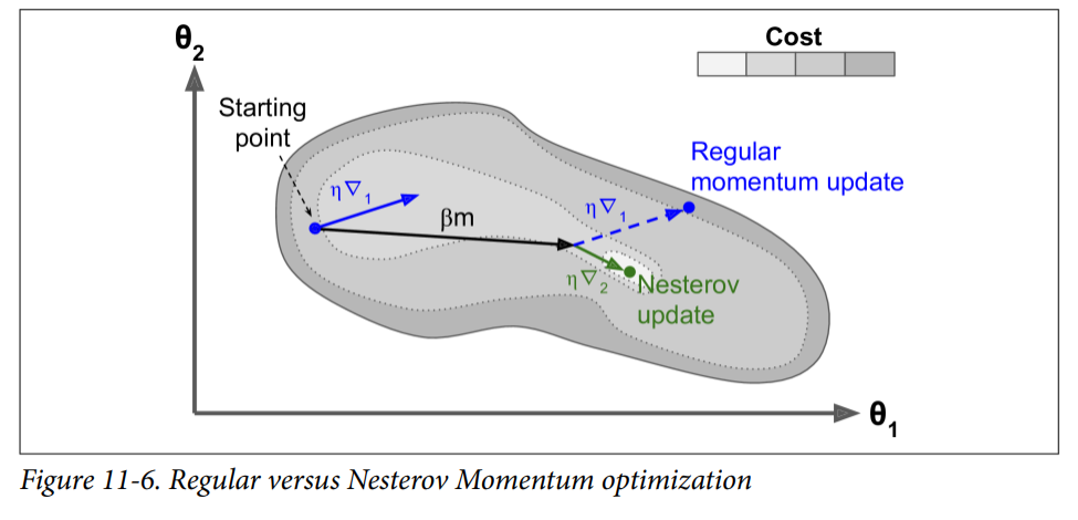

In [65]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

##### 3]] AdaGrad

[[1]] 개념 ♣♣

- 알고리즘이 전역 최적점 방향을 조금 더 일찍 잡을수 있도록 지원 ♣♣
- 가장 가파른 차원을 따라 그레디언트 벡터의 스케일을 감소시킴 ♣♣
- 논문: https://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf

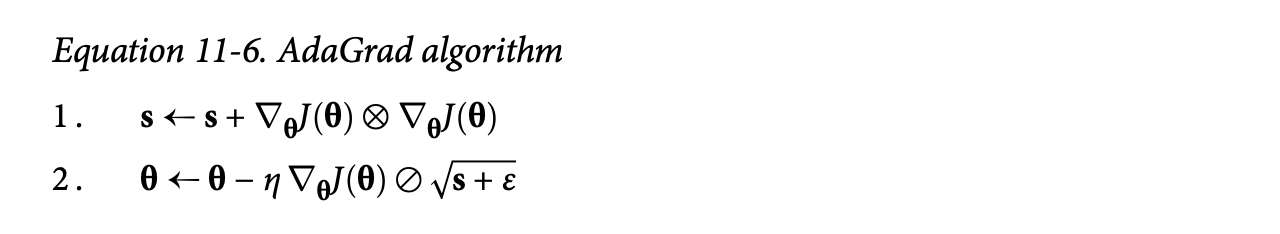

- average filter와 비슷하다

/ : 원소 나눗셈

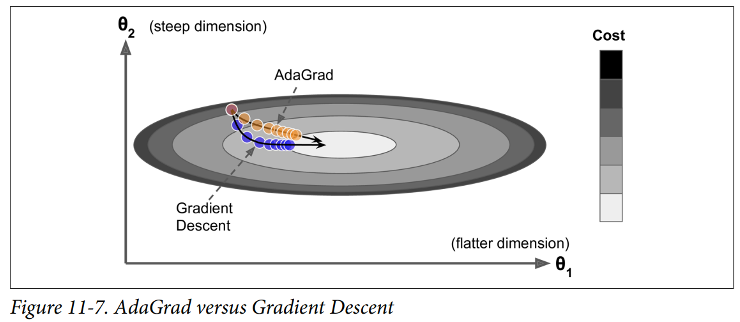

[[2]] 특징 ♣♣

- 위처럼 그레디언트 제곱을 벡터 s에 누적
- 그레디언트 벡터를 s로 나누어줌으로써 스케일을 조정
- 이를 통해 학습률을 감소시키지만 경사가 완만한 차원보다 가파른 차원에 대해 더 빠르게 감소시킴 : 적응적 학습률(adaptive learning rate)
- 이를 통해 전역 최적점 방향으로 더 곧장 가도록 갱신되는 데 도움을 줌

In [66]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

[[3]] 단점

- AdaGrad는 간단한 2차방정식 문제에 대해서는 잘 작동하지만 신경망 훈련시 너무 일찍 멈추는 경우가 있음 ♣♣ 반드시 기억
- 따라서, AdaGrad는 선형 회귀 같은 간단한 작업에는 효과적이지만, 심층 신경망에는 추천하지 않음 ♣♣ 반드시 기억

##### 4]] RMSProp

[[1]] 개념 ♣♣

- AdaGrad가 너무 빨리 느려져 전역 최적점에 수렴하지 못하는 위험을 해결하기 위해 제안
- (훈련 시작부터의 모든 그레디언트가 아닌) 가장 최근 반복에서 비롯된 그레디언트만 누적함
- 이를 위해 알고리즘의 첫 번째 단계에 지수 감소를 위한 beta를 사용

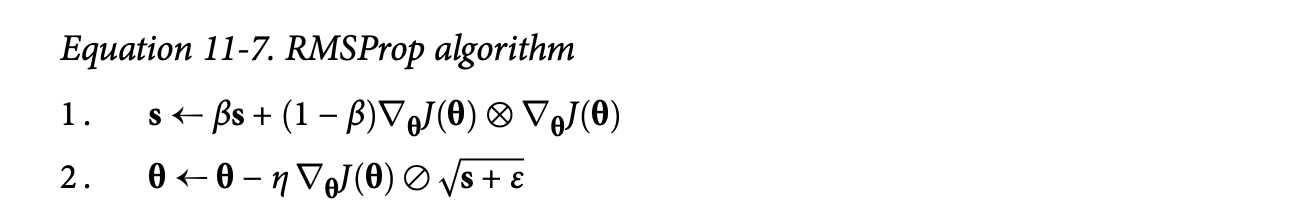

- low pass filter와 비슷하다

In [67]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) # rho가 beta에 해당

##### 5]] Adam 최적화 ♣♣♣

- Adam: 적응적 모멘트 추정 (adaptive moment estimation)
- 모멘텀 최적화 + RMSProp 아이디어를 합친 것

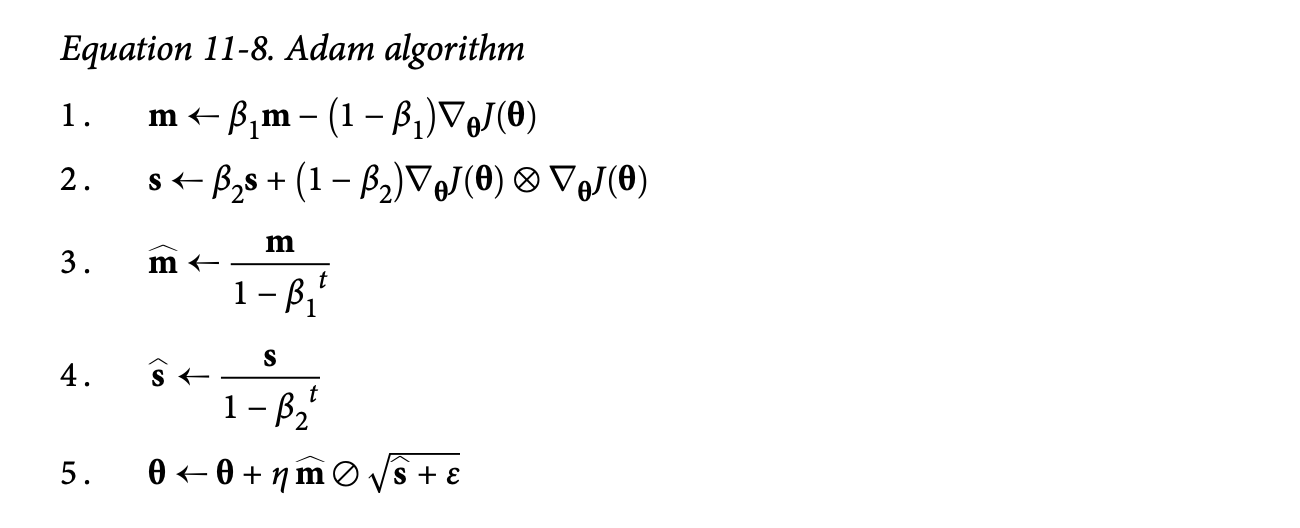

In [68]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

##### 6]] 학습률 스케줄링

[[1]] 종류

① 거듭제곱 기반 스케줄링 (power scheduling) ♣♣

```lr = lr0 / (1 + steps / s)**c```
* steps가 s번 진행될 때 마다 lr(learning rate)가 감소

In [69]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [70]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [71]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8270 - val_loss: 0.4065 - val_accuracy: 0.8612
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3793 - accuracy: 0.8654 - val_loss: 0.3733 - val_accuracy: 0.8698
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3470 - accuracy: 0.8772 - val_loss: 0.3755 - val_accuracy: 0.8704
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3262 - accuracy: 0.8845 - val_loss: 0.3513 - val_accuracy: 0.8792
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3111 - accuracy: 0.8895 - val_loss: 0.3452 - val_accuracy: 0.8778
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2977 - accuracy: 0.8939 - val_loss: 0.3428 - val_accuracy: 0.8818
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2876 - accuracy: 0.8979 - val_loss: 0.3383 - val_accuracy:

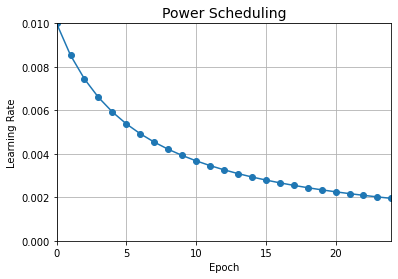

In [72]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

② 지수 기반 스케줄링(exponential scheduling) ♣♣

```lr = lr0 * 0.1**(epoch / s)```
- 학습률이 s 스텝마다 10배씩 점차 감소

In [73]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [74]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [76]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8332 - accuracy: 0.7589 - val_loss: 0.8625 - val_accuracy: 0.7572 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6652 - accuracy: 0.7965 - val_loss: 0.5762 - val_accuracy: 0.8138 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6014 - accuracy: 0.8169 - val_loss: 0.9038 - val_accuracy: 0.7550 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6247 - accuracy: 0.8140 - val_loss: 0.5785 - val_accuracy: 0.8180 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5012 - accuracy: 0.8439 - val_loss: 0.6563 - val_accuracy: 0.8514 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4608 - accuracy: 0.8521 - val_loss: 0.4793 - val_accuracy: 0.8594 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

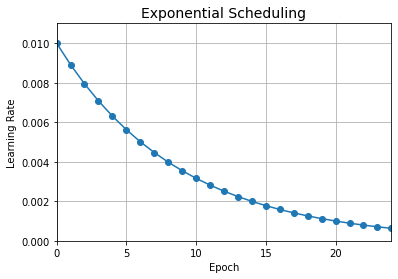

In [77]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

③ 구간별 고정 스케줄링(piecewise constant scheduling) ♣

- 일정 횟수의 에포크 동안 일정한 학습률을 사용하고 그 다음 또 다른 횟수의 에포크 동안 작은 학습률을 사용하는 방식

In [78]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [79]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [80]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8269 - accuracy: 0.7623 - val_loss: 0.8138 - val_accuracy: 0.7418 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8900 - accuracy: 0.7494 - val_loss: 0.8583 - val_accuracy: 0.7908 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8801 - accuracy: 0.7605 - val_loss: 1.0236 - val_accuracy: 0.7376 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9030 - accuracy: 0.7556 - val_loss: 0.9097 - val_accuracy: 0.7858 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9748 - accuracy: 0.7260 - val_loss: 1.8109 - val_accuracy: 0.5980 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6318 - accuracy: 0.8143 - val_loss: 0.6021 - val_accuracy: 0.8432 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

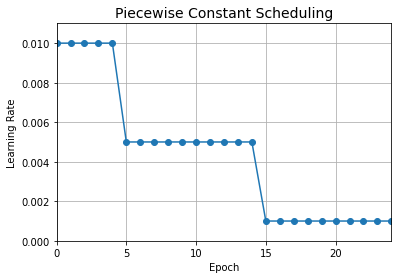

In [81]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

④ 성능 기반 스케줄링(performance scheduling) ♣

- 매 N 스텝마다 검증 오차를 측정하고 오차가 줄어들지 않으면 학습률을 감소시킴

In [82]:
tf.random.set_seed(42)
np.random.seed(42)

In [83]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5) ## patience 동안 오차가 줄지 않으면 학습률을 0.5 (반으로) 감소

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5903 - accuracy: 0.8073 - val_loss: 0.4792 - val_accuracy: 0.8536 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4939 - accuracy: 0.8405 - val_loss: 0.5804 - val_accuracy: 0.8358 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5162 - accuracy: 0.8405 - val_loss: 0.5015 - val_accuracy: 0.8572 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5191 - accuracy: 0.8464 - val_loss: 0.5044 - val_accuracy: 0.8502 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5162 - accuracy: 0.8501 - val_loss: 0.5713 - val_accuracy: 0.8390 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5069 - accuracy: 0.8553 - val_loss: 0.6167 - val_accuracy: 0.8404 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 7s

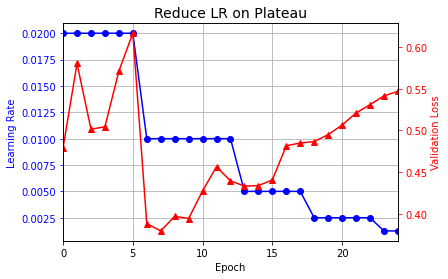

In [84]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

⑤ 1사이클 스케줄링(1cycle scheduling) ♣♣

- 훈련 절반 동안 초기 학습률을 선형적으로 증가시키고, 그다음 나머지 절반 동안 선형적으로 학습률을 줄임
- 마지막 몇 번의 에포크는 학습률을 소수점 몇 째 자리까지 줄임

## 3) Overfitting 해결방안

### (1) Regularization

#### 1] 종류

##### [1] $\ell_1$과 $\ell_2$ Regularization

In [85]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [86]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 15s 8ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


##### [2] DropOut

1]] 개념

- 2012년 Geoffrey Hinton이 제안: https://arxiv.org/abs/1207.0580
- 매 훈련 스텝에서 각 뉴런 (입력 뉴런은 포함하고 출력 뉴런은 제외)은 임시적으로 드롭아웃될 확률 p를 가짐 (이런 뉴런은 반복에서 0을 출력함) ♣♣

2]] 특징

- 하이퍼파라미터 p를 드롭아웃 비율(dropout rate)이라고 하고 보통 10% ~ 50% 지정
  - 순환 신경망 : 20% ~ 30% ♣♣
  - 합성곱 신경망 : 40% ~ 50% ♣♣
- 드롭아웃으로 훈련된 뉴런은 이웃한 뉴런에 맞추어 적응될 수 없고, 자기 자신이 유용해져야 함 ♣
- 이를통해 입력값의 작은 변화에 덜 민감해지고, 결국 더 안정적인 네트워크가 되어 일반화 성능이 좋아짐 ♣

In [87]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 19s 10ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8652
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4229 - accuracy: 0.8454 - val_loss: 0.3471 - val_accuracy: 0.8698


3]] 종류 ♣♣♣

- [[1]] 일반드롭아웃
- [[2]] 알파드롭아웃: keras.layers.AlphaDropout(rate=0.2)
- [[3]] 몬테 카를로 드롭아웃 (Monte Carlo dropout)

##### [3]  Max-Norm Regularization

1]] 개념 ♣♣♣

- 연결 가중치 w의 l2 norm이 r값 이하가 되도록 규제 (최대값을 규제)
- 최대값을 넘을 경우 스케일을 조정함

In [88]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [90]:
from functools import partial

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4843 - accuracy: 0.8307 - val_loss: 0.3919 - val_accuracy: 0.8656
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3574 - accuracy: 0.8694 - val_loss: 0.3722 - val_accuracy: 0.8656


# 2. 요약 가이드라인

## 1) 기본 DNN 설정 ♣♣♣

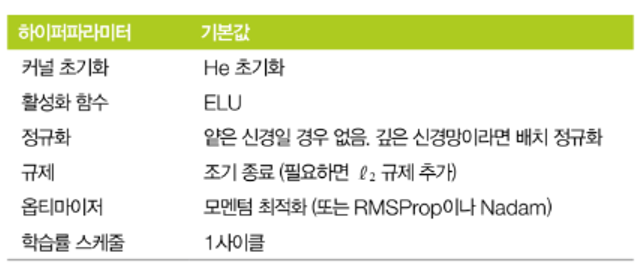

## 2) Self Normalization를 위한 DNN 설정 ♣♣♣

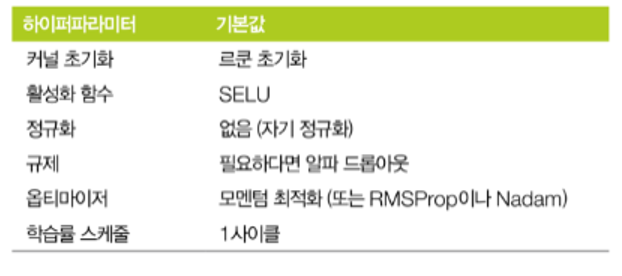